# Random Forests

Ensemble of several overfitting decision tree classifiers using bagging.\
For decision trees, the most used techniques of ensembling are bagging and boosting.\
**Bagging**: Create several, equally-sized smaller datasets from a dataset. We create them by sampling from the larger dataset *with replacement*. We then pick some amount of random features from the small dataset, make a decision tree, and look at the results. Bagging can be done parallel.\
**Boosting**: Boosting is done sequential and has information from the previous decision tree(s).

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()

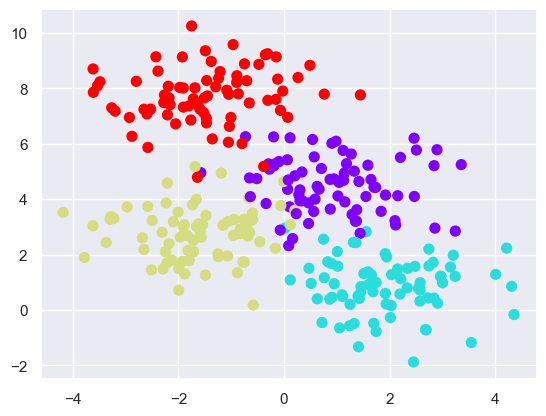

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [24]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'): 
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()))
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1), cmap=cmap)
    ax.set(xlim=xlim, ylim=ylim)

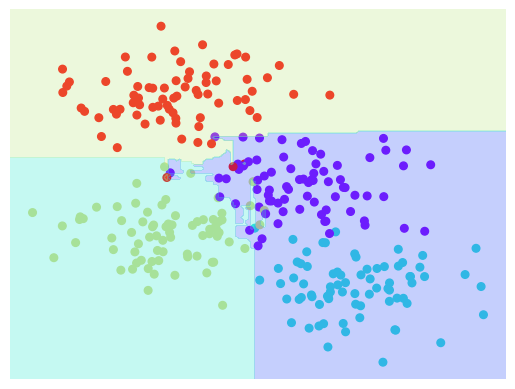

In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
# 80% of my original data in my sample is the max.
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
visualize_classifier(bag, X, y)

# Random Forest Classification

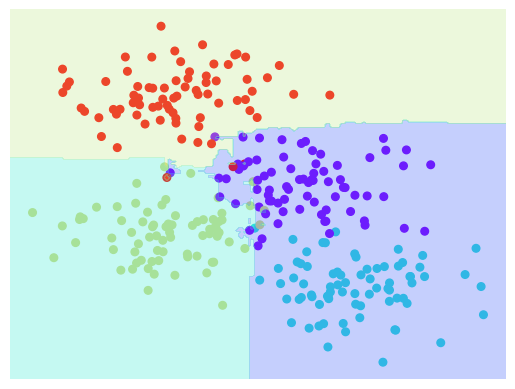

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_samples=0.8, random_state=1)
visualize_classifier(model, X, y)

# Random Forest Regression

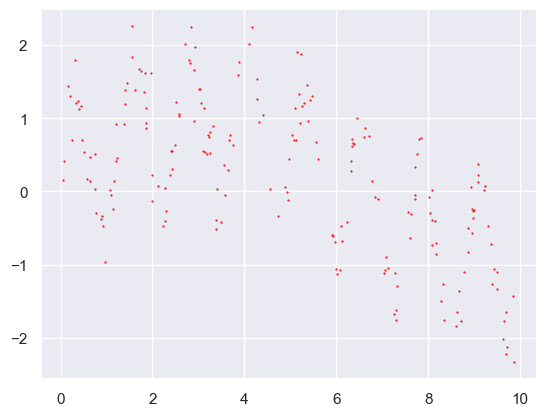

In [16]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3): 
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise 
y = model(x)
plt.scatter(x.reshape(x.shape[0],1), y, 0.3, color = "red");

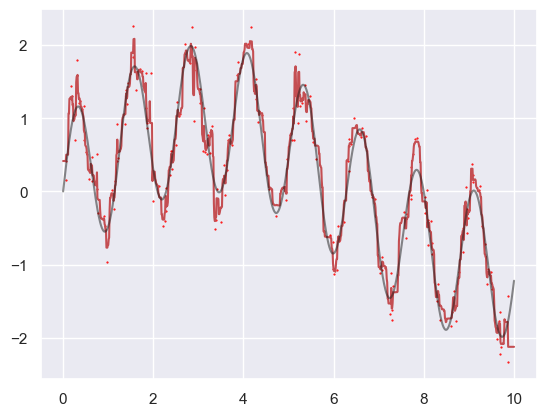

In [17]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor(200) 
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.scatter(x, y, 0.3, color='red')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

In [18]:
score_test = forest.score(xfit.reshape(xfit.shape[0],1), ytrue)

In [19]:
score_test

0.9584923298190231

In [20]:
score_train = forest.score(x.reshape(x.shape[0],1), y)
score_train

0.9830429595932124

# Hyperparameters to explore

n_estimators: Number of trees the algorithm builds before averaging the predictions.<br/>
max_features: Maximum number of features random forest considers splitting a node. <br/>
mini_sample_leaf: minimum number of samples required to be at a leaf node <br/>
criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss) <br/>
max_leaf_nodes: Maximum leaf nodes in each tree <br/>
n_jobs: how many processors it is allowed to use. <br/>